### Exploratory Data Analysis (EDA) for Russian Presidential Election Polls 2024 Dataset

In [ ]:
# 3. Do the Eda on this Dataset : Presidential Election Polls 2024 Dataset and extract useful information from this: Link: Dataset: Nationwide Russian election 
# poll data from March 04, 2024 Dataset Description: This dataset comprises the results of a nationwide presidential election poll conducted on March 4, 2024. 
# The data offers various insights but does not align with the official election results. You are encouraged to create your notebooks and delve into the data for 
# further exploration.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot') # Use stylesheet for plots
#plt.style.use('fivethirtyeight')
#pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', None)

%matplotlib inline

### Step 1: Reading Data and Data Understanding
- Read/Load Dataset

- Check Memory usage of the dataset. If large dataset, do the steps below as needed
    - Reduce the memory by removing unnecessary features/observations for the analysis
    - Reduce the memory by changing the datatype of the columns, float64->float16, int64->int16, object->category
    - Load dataset in chunks

- Check for basic information of the dataset
    - Check the number of observations and features of the Dataset
    - Top and bottom observations to understand the pattern
    - List the datatypes of the features

- Check for basic statistical information of the dataset

In [29]:
# Load Dataset
election_poll_df = pd.read_csv("./datasets/election2024.csv")

In [30]:
# Check the memory
election_poll_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [31]:
num_observations = election_poll_df.shape[0]
num_features = election_poll_df.shape[1]
print(f"Number of Observations: {num_observations}\nNumber of Features: {num_features}")

Number of Observations: 1600
Number of Features: 16


In [32]:
election_poll_df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [33]:
election_poll_df.tail()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
1595,0716b23c2c0cee3a,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.270761
1596,07168254d14ceb55,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,NaN,NaN,0.921724
1597,071690f34d4ce164,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.396691
1598,0716bfa9c48ce79a,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849
1599,07168088318cef88,female,76.0,ural,village,named correct date,definitely yes,Putin,over 4 hours a day,over 4 hours a day,school,hard to say,unemployed pensioner,NaN,NaN,0.860836


In [34]:
election_poll_df.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [35]:
election_poll_df.describe(include='object')

,id,sex,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type
count,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,692,879
unique,1600,2,8,7,4,6,7,6,6,6,6,11,6,21
top,07169ed8148ce047,female,central,city with population of 100-500k,named correct date,definitely yes,Putin,less than 4 hours a day,less than 4 hours a day,college,medium,work for hire,commercial organization,"industry, manufacturing"
freq,1,843,425,391,1361,1062,1128,490,613,690,949,535,445,138


##### ************* Insights on dataset
- Memory usage is 1.5 MB, can be reduced by removing unnecessary columns and changing datatypes.
- 'id' column can be removed without losing much information on the dataset for analysis.
- 'job_type' column has around 43% null values, 'company_type' column has around 55% null values. These two columns can be removed for further analysis.

In [36]:
election_poll_df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [37]:
# Removing unnecessary columns without losing information for analysis

election_poll_df = election_poll_df[['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date', 'will_vote', 'candidate', 'television_usage',
                                      'internet_usage', 'education', 'income', 'employment', 'weight1']].copy()

In [38]:
election_poll_df.shape

(1600, 13)

In [39]:
election_poll_df.isnull().sum()

sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
weight1                0
dtype: int64

In [41]:
election_poll_df.sample(5)

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
207,male,44.0,southern,city with population of 100-500k,named correct date,definitely no,will not take part,several times a week,less than 4 hours a day,bachelor degree,high,unemployed,0.785185
386,female,45.0,north caucasian,city with population of 100-500k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,academic degree,high,entrepreneur,1.224233
727,female,60.0,central,city with population of 100-500k,named correct date,definitely yes,Putin,less than 4 hours a day,less than 4 hours a day,college,medium,employed pensioner,0.622922
1176,male,43.0,central,city with population of 1 million and higher,named correct date,definitely yes,Putin,several times a month,less than 4 hours a day,bachelor degree,medium,work for hire,1.111258
1388,male,75.0,central,city with population of 1 million and higher,named correct year,likely yes,Putin,over 4 hours a day,several times a week,college,medium,unemployed pensioner,0.865803


### Step 2: Data Preparation
- Drop irrelevant features and observations
- Identify and drop duplicate features and observations
- Replace features(columns) values with appropriate values
- Handle Missing Data

NOTE: ********************** All the above steps are taken care as part of previous inferences

### Handling Duplicates Value

In [46]:
duplicate = election_poll_df[election_poll_df.duplicated()]

if (len(duplicate) == 0):
    print("No duplicate rows:")
else:
    print("Duplicate Rows: \n", duplicate)

No duplicate rows:


In [48]:
election_poll_df.columns

Index(['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'weight1'],
      dtype='object')

In [130]:
election_poll_df.rename(columns={'weight1': 'weight'}, inplace=True)

### Step 3: Feature Understanding and Feature Relations
- Feature (Univariate) Analysis
    - Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot
- Feature Relations
    - Bivariate Analysis
        - Scatterplot
        - Pairplot
        - Groupby Comparisons
    - Multivariate Analysis
        - Heatmap Correlation

In [50]:
# Identifying the Numerical Column And Categorial column

cat_cols = [col for col in election_poll_df.columns if election_poll_df[col].dtype == "object"]
num_cols = [col for col in election_poll_df.columns if election_poll_df[col].dtype != "object"]

In [52]:
print("Numerical Columns :", num_cols)

Numerical Columns : ['age', 'weight1']


In [53]:
print("Categorical Columns :", cat_cols)

Categorical Columns : ['sex', 'federal_district', 'type_of_city', 'knows_election_date', 'will_vote', 'candidate', 'television_usage', 'internet_usage', 'education', 'income', 'employment']


In [56]:
for col in cat_cols:
    print(f"{col} has {election_poll_df[col].unique()} values \n")

sex has ['male' 'female'] values 

federal_district has ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern'] values 

type_of_city has ['village' 'city with population of less than 50k'
 'city with population of 1 million and higher'
 'city with population of 50-100k' 'city with population of 100-500k'
 'settlement' 'city with population of 500-950k'] values 

knows_election_date has ['named correct date' 'not sure or no answer' 'wrong answer'
 'named correct year'] values 

will_vote has ['not sure' 'definitely yes' 'likely no' 'definitely no' 'likely yes'
 'struggle to answer'] values 

candidate has ['Putin' 'Davankov' 'will not take part' 'spoilt vote' 'Kharitonov'
 'struggle to answer' 'Slutskiy'] values 

television_usage has ['several times a week' 'once half a year' 'does not watch'
 'less than 4 hours a day' 'over 4 hours a day' 'several times a month'] values 

internet_usage has ['over 4 hours a day' 'less than 4 hours a day' 'seve

### Univariate Analysis - Sex

In [60]:
election_poll_df["sex"].value_counts()

sex
female    843
male      757
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

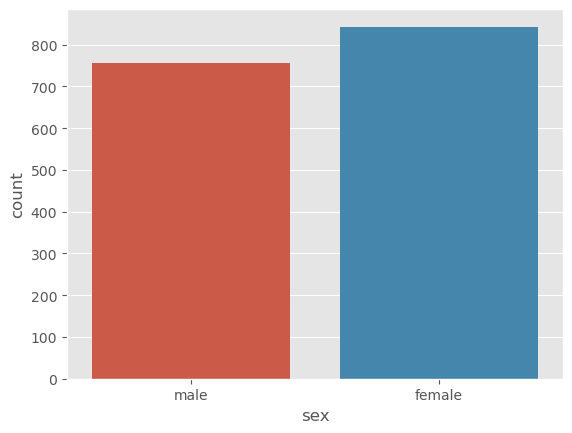

In [61]:
sns.countplot(x='sex', data=election_poll_df)

<Axes: ylabel='count'>

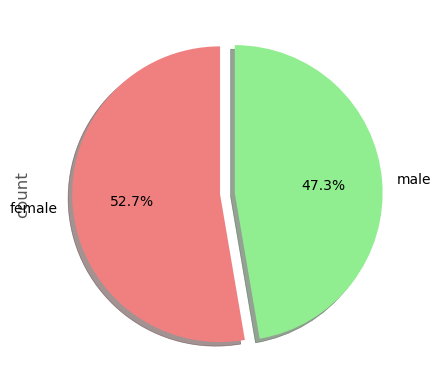

In [62]:
# Make a Pie Chart To understand Clearly
election_poll_df['sex'].value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'lightgreen'], explode = (0, 0.1), startangle = 90, shadow = True)

### Univariate Analysis - Age

Text(0.5, 1.0, 'Box plot for age')

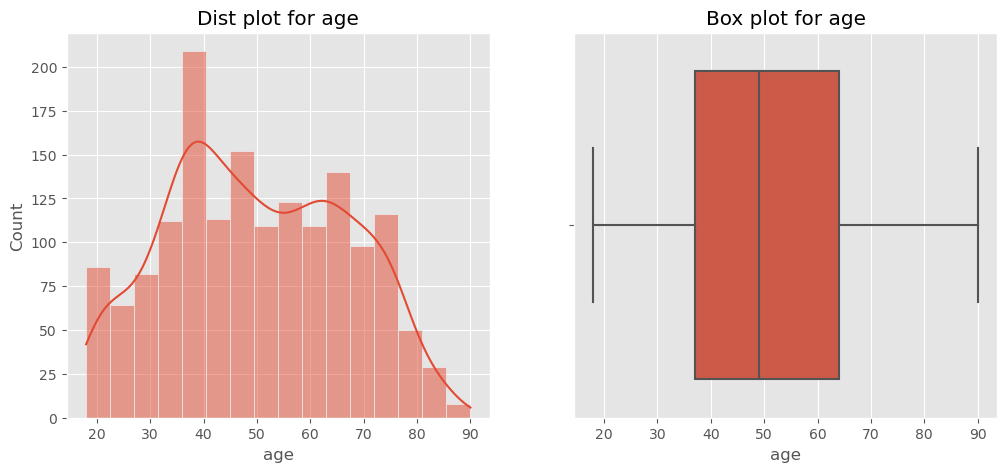

In [66]:
#To check distribution, outlier >> distplot, boxplot

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(election_poll_df['age'], kde = True)
plt.title("Dist plot for age")

plt.subplot(1, 2, 2)
sns.boxplot(data =election_poll_df, x = 'age')
plt.title("Box plot for age")

<Axes: xlabel='federal_district', ylabel='count'>

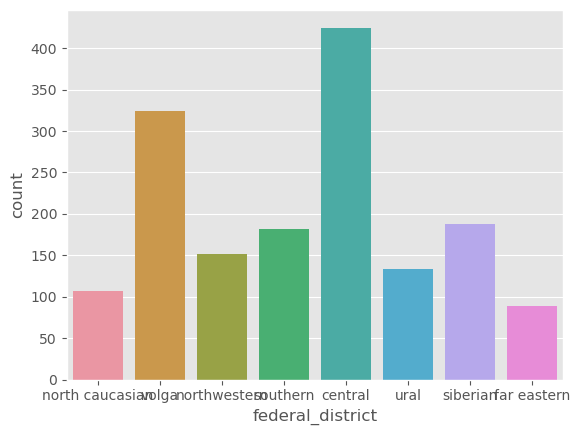

In [76]:
#To check distribution among federal districts
sns.countplot(x='federal_district', data=election_poll_df)

<Axes: ylabel='count'>

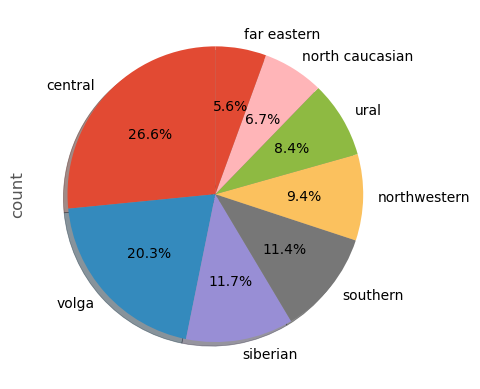

In [77]:
election_poll_df['federal_district'].value_counts().plot.pie(autopct = '%1.1f%%', startangle = 90, shadow = True)

In [78]:
election_poll_df['type_of_city'].unique()

array(['village', 'city with population of less than 50k',
       'city with population of 1 million and higher',
       'city with population of 50-100k',
       'city with population of 100-500k', 'settlement',
       'city with population of 500-950k'], dtype=object)

<Axes: ylabel='count'>

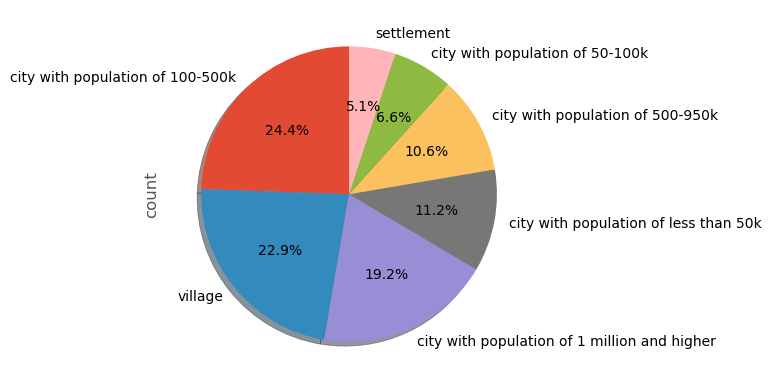

In [79]:
# Make a Pie Chart to visualize population distribution among difference places
election_poll_df.type_of_city.value_counts().plot.pie(autopct = '%1.1f%%', startangle = 90, shadow = True)

In [ ]:
# Replacing Some greator values by Short names
# election_poll_df['type_of_city'].replace({'city with population of less than 50k': 'city(<50k)', 'city with population of 1 million and higher': 'city(1M+)' ,'city with population of 50-100k' : 'city(50-100k)' , 'city with population of 100-500k' : 'city(100-500k)' , 'city with population of 500-950k' : 'city(500-950k)'}, inplace=True)

In [87]:
# Vote distribution

election_poll_df['will_vote'].value_counts()

will_vote
definitely yes        1062
likely yes             218
not sure               166
definitely no           86
likely no               55
struggle to answer      13
Name: count, dtype: int64

<Axes: xlabel='will_vote', ylabel='count'>

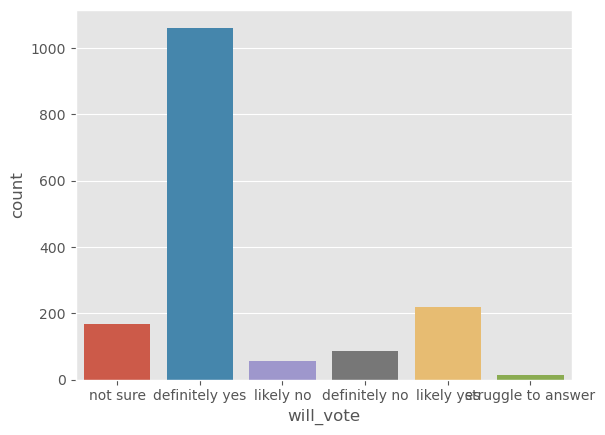

In [91]:
# Make a Pie Chart To understand Clearly

sns.countplot(election_poll_df, x='will_vote')
#election_poll_df['will_vote'].value_counts().plot.pie(autopct = '%1.1f%%', startangle = 90, shadow = True)

In [92]:
election_poll_df['will_vote'].replace({'not sure': 0,'definitely yes': 1, 'likely no': 0, 'definitely no': 0,'likely yes' : 1, 'struggle to answer' : 0}, inplace = True)

<Axes: xlabel='will_vote', ylabel='count'>

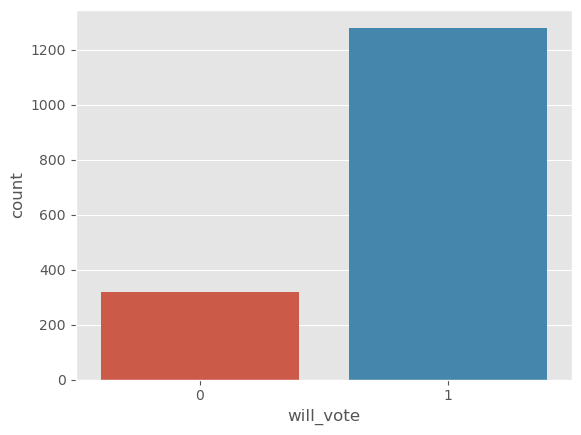

In [93]:
sns.countplot(election_poll_df, x='will_vote')

### EDA For Candidate

In [97]:
election_poll_df["candidate"].unique()

array(['Putin', 'Davankov', 'will not take part', 'spoilt vote',
       'Kharitonov', 'struggle to answer', 'Slutskiy'], dtype=object)

In [102]:
election_poll_df["candidate"].replace({'will not take part' : 'Putin' , 'struggle to answer' : 'Putin'}, inplace = True)

In [103]:
election_poll_df["candidate"].unique()

array(['Putin', 'Davankov', 'spoilt vote', 'Kharitonov', 'Slutskiy'],
      dtype=object)

<Axes: xlabel='candidate', ylabel='count'>

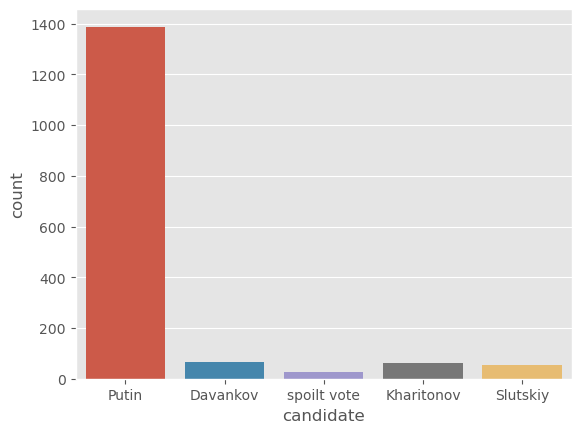

In [104]:
sns.countplot(x='candidate', data=election_poll_df)

In [106]:
election_poll_df['television_usage'].unique()

array(['several times a week', 'once half a year', 'does not watch',
       'less than 4 hours a day', 'over 4 hours a day',
       'several times a month'], dtype=object)

In [108]:
#election_poll_df['television_usage'].value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'lightgreen'], startangle = 90, shadow = True)

In [110]:
#df['television_usage'].replace({'does not watch': 1,'once half a year': 2, 'several times a month': 4, 'less than 4 hours a day': 6,
    # 'several times a week': 8, 'over 4 hours a day': 10}, inplace = True )

array(['over 4 hours a day', 'less than 4 hours a day',
       'several times a week', 'does not use internet',
       'several times a month', 'once half a year'], dtype=object)

In [120]:
election_poll_df['education'].value_counts()

education
college                        690
bachelor degree                550
school                         181
academic degree                 95
incomplete school education     80
no school education              4
Name: count, dtype: int64

In [121]:
election_poll_df["education"].replace({'incomplete school education' : 'incomplete' , 'no school education' : 'no school'}, inplace = True)

In [122]:
election_poll_df['education'].value_counts()

education
college            690
bachelor degree    550
school             181
academic degree     95
incomplete          80
no school            4
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

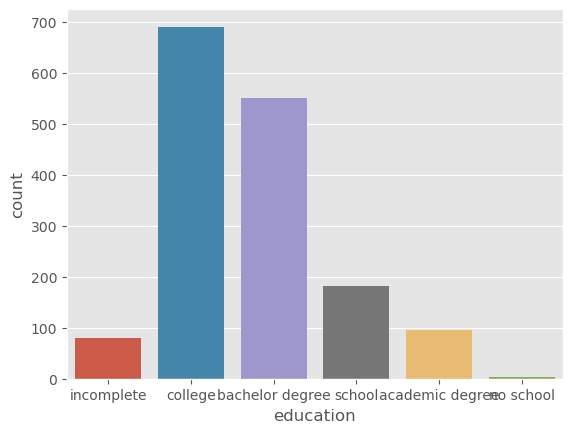

In [123]:
sns.countplot(x='education', data=election_poll_df)

In [125]:
election_poll_df['income'].unique()

array(['very high', 'high', 'medium', 'low', 'very low', 'hard to say'],
      dtype=object)

<Axes: xlabel='income', ylabel='count'>

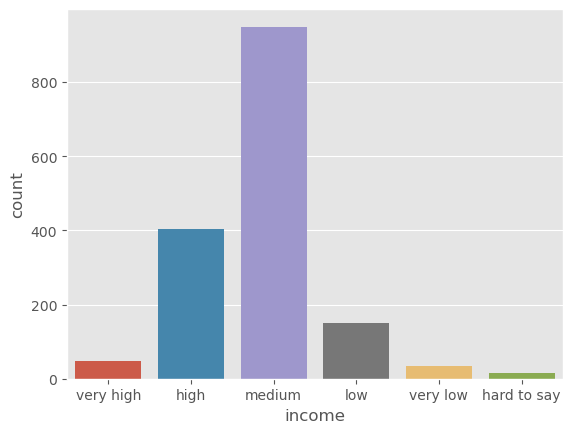

In [127]:
sns.countplot(x='income', data=election_poll_df)

In [129]:
election_poll_df['employment'].value_counts()

employment
work for hire           535
unemployed pensioner    502
self-employed           122
employed pensioner      120
unemployed              101
entrepreneur             87
parental leave           44
employed student         37
unemployed student       27
hard to say              22
refused to answer         3
Name: count, dtype: int64

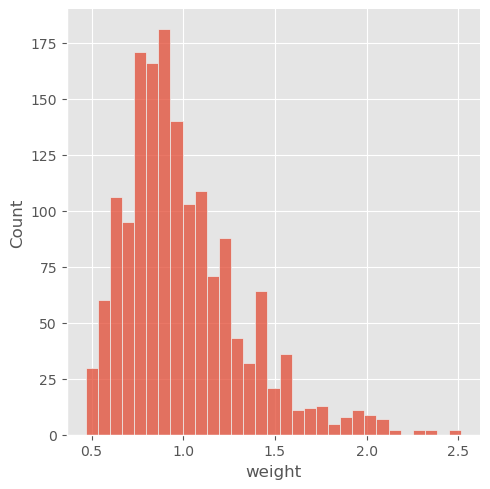

In [134]:
election_poll_df['weight'].value_counts()

sns.displot(data=election_poll_df, x='weight')

<Axes: xlabel='education', ylabel='count'>

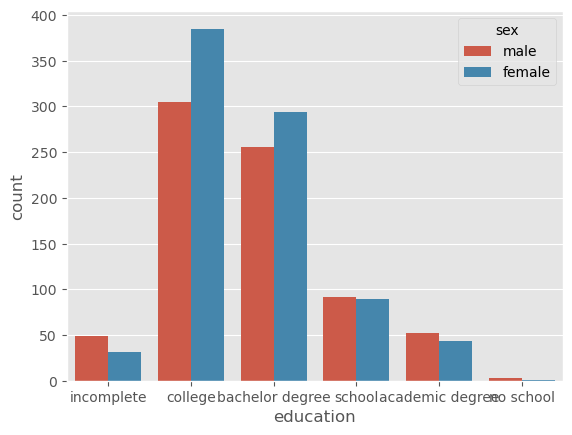

In [143]:
sns.countplot(data=election_poll_df, x='education', hue='sex')

<Axes: xlabel='income', ylabel='count'>

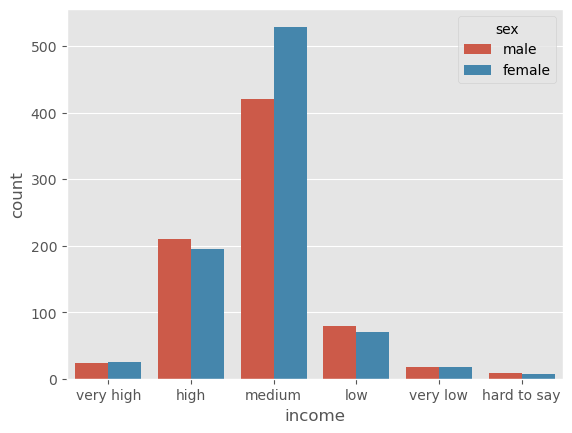

In [147]:
sns.countplot(data=election_poll_df, x='income', hue='sex')

<Axes: xlabel='education', ylabel='count'>

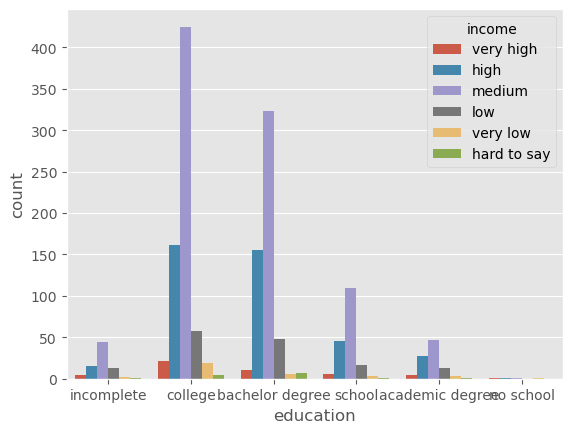

In [148]:
sns.countplot(data=election_poll_df, x='education', hue='income')